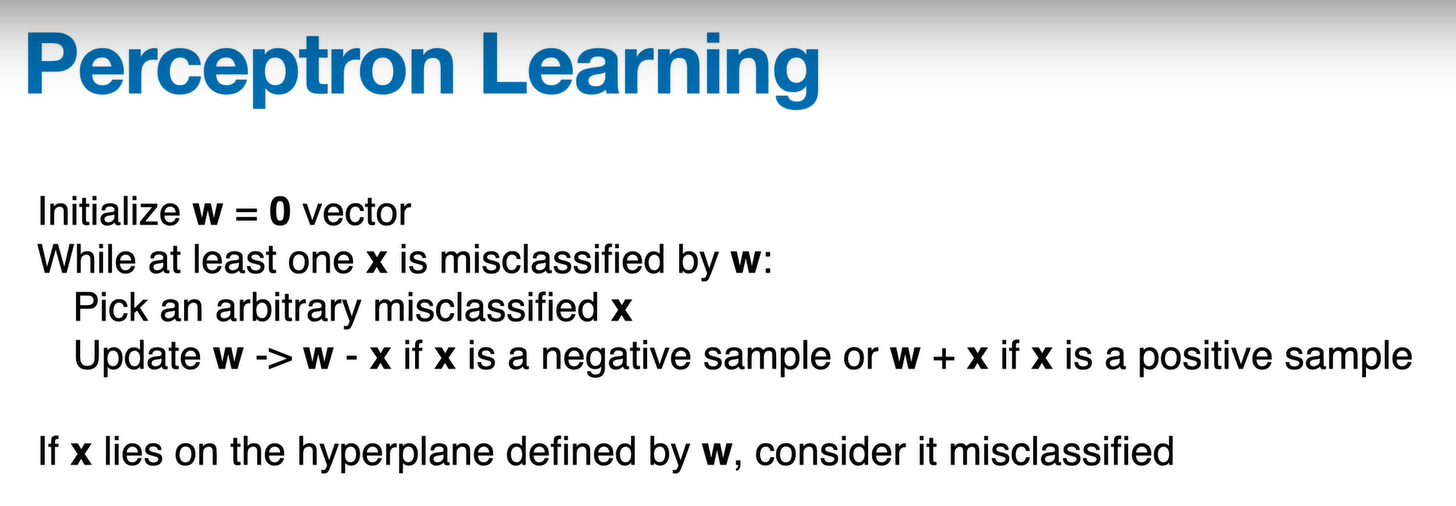

In [1]:
import numpy as np
import pandas as pd

In [2]:
mints_df = pd.read_csv('..\data\separable_data_2d.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\986hi\AppData\Local\Temp\ipykernel_16996\3328770015.py:1: SyntaxWarning: invalid escape sequence '\d'
  mints_df = pd.read_csv('..\data\separable_data_2d.csv')


In [3]:
mints_df.shape

(100, 3)

In [4]:
mints_df

,y,x1,x2
0,1,0.805,0.382
1,1,0.690,0.792
2,0,0.055,0.028
3,1,0.405,0.939
4,0,0.424,0.598
...,...,...,...
95,0,0.277,0.139
96,1,0.956,0.875
97,0,0.522,0.016
98,1,0.611,0.654


In [5]:
#=== Perceptron class ============================================================================================

class Perceptron():
    """
    Perceptron model for predicting binary target with canonical learning algorithm
    """

    def __init__(self, w = None, y_classes = None):
        self.w = w
        self.y_classes = y_classes

    def fit(self, X, y, MAXITERS = 100_000):
        """
        Learn separating hyperplane (1-D array of weights, w) via canonical learning algorithm

        :param X: 2-D array with >= 1 column of real-valued features
        :param y: 1-D array of labels; should have two distinct classes
        :param MAXITERS: how many iterations before we give up
        :return: None; set self.y_classes and self.w if a separating hyperplane is found
        """

        # Validate X dimensionality
        if X.ndim != 2:
            raise AssertionError(f"X should have 2 dimensions but it has {X.ndim}")

        # Determine/validate y_classes
        y_classes = np.unique(y)
        if len(y_classes) != 2:
            AssertionError(f"y should have 2 distinct classes, but instead it has {len(y_classes)}")

        # Convert y to 1-d array of {0, 1} where 0 represents class y_classes[0] and 1 represents y_classes[1]
        y01 = (y == y_classes[1]).astype('int64')

        # Initialize X1 (X with extra column of 1s at the end), w (weight array), i, j
        X1 = np.insert(X, X.shape[1], 1, axis=1)
        w = np.repeat(0, X1.shape[1])
        i, j = 0, 0

        # Loop until i traverses X1 with no updates (-> w is a separating hyperplane) or MAXITERS is reached
        while i < X1.shape[0]:

            # Classify X1_i using w
            yhat_i = (np.sign(X1[i].dot(w)) + 1) / 2

            # Check if yhat_i is incorrect
            if yhat_i != y01[i]:

                # Update the weight array; reset i
                if y01[i] == 1:
                    w = w + X1[i]
                else:
                    w = w - X1[i]
                i = 0

            # If yhat_i is correct..
            else:

                # i has traversed all of X1 without misclassification, so w is a separating hyperplane
                if (i+1) == X1.shape[0]:
                    print("Found a separating hyperplane!")
                    break

                # i hasn't traversed all of X1 yet. Increment it
                else:
                    i += 1

            # Check if MAXITERS has been reached. If not, increment j and carry on
            if j == MAXITERS:
                raise AssertionError("MAXITERS reached. Maybe the data isn't linearly separable..")
            j += 1

        # Update object attributes y_classes and w
        self.y_classes = y_classes
        self.w = w

    def predict(self, X):
        """
        Predict on X using this object's w.
        If w•x > 0 we predict y_classes[1], otherwise we predict y_classes[0]

        :param X: 2-D array with >= 1 column of real-valued features
        :return: 1-D array of predicted class labels
        """

        if self.w is None:
            raise AssertionError(f"Need to fit() a before predict()")
        if X.ndim != 2:
            raise AssertionError(f"X should have 2 dimensions but it has {X.ndim}")
        if X.shape[1] != len(self.w) - 1:
            raise AssertionError(f"Perceptron was fit on X with {len(self.w) - 1} columns but this X has {X.shape[1]} columns")

        X1 = np.insert(X, X.shape[1], 1, axis=1)
        yhat = (X1.dot(self.w) > 0).astype('int64')
        preds = self.y_classes[yhat]

        return preds

In [6]:
p1= Perceptron()

In [8]:
p1.fit(X= mints_df.loc[0:80, ].to_numpy(), y= mints_df.loc[0:80, 'y'].to_numpy())

Found a separating hyperplane!


In [9]:
p1.predict(X= mints_df.loc[80:, ].to_numpy())

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)